In [17]:
from __future__ import division
import csv
from csv import reader
import random
import math
import numpy as np
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
import matplotlib.pyplot as plt



def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

def splitDataset(dataset, splitRatio):
	trainSize = int(len(dataset) * splitRatio)
	trainSet = []
	copy = list(dataset)
	while len(trainSet) < trainSize:
		index = random.randrange(len(copy))
		trainSet.append(copy.pop(index))
	return [trainSet, copy]

def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup


def separateByClass(dataset):
	separated = {}
	for i in range(len(dataset)):
		vector = dataset[i]
		if (vector[-1] not in separated):
			separated[vector[-1]] = []
		separated[vector[-1]].append(vector)
	return separated

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

def mean(numbers):
	return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = float(sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1))
    return math.sqrt(variance)

def summarize(dataset):
	summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
	del summaries[-1]
	return summaries

def summarizeByClass(dataset):
	separated = separateByClass(dataset)
	summaries = {}
	for classValue, instances in separated.items():
		summaries[classValue] = summarize(instances)
	return summaries

def calculateProbability(x, mean, stdev):
	exponent = math.exp(-(math.pow(x-mean,2)/float(2*math.pow(stdev,2))))
	return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
	probabilities = {}
	for classValue, classSummaries in summaries.items():
		probabilities[classValue] = 1
		for i in range(len(classSummaries)):
			mean, stdev = classSummaries[i]
			x = inputVector[i]
			probabilities[classValue] *= calculateProbability(x, mean, stdev)
	return probabilities
			
def predict(summaries, inputVector):
	probabilities = calculateClassProbabilities(summaries, inputVector)
	bestLabel, bestProb = None, -1
	for classValue, probability in probabilities.items():
		if bestLabel is None or probability > bestProb:
			bestProb = probability
			bestLabel = classValue
	return bestLabel

def getPredictions(summaries, testSet):
	predictions = []
	for i in range(len(testSet)):
		result = predict(summaries, testSet[i])
		predictions.append(result)
	return predictions

def getAccuracy(testSet, predictions):
	correct = 0
	for i in range(len(testSet)):
		if testSet[i][-1] == predictions[i]:
			correct += 1
	return (correct/float(len(testSet))) * 100.0


In [18]:
def main():
    filename = 'iris.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
#     print(dataset)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split iris dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix:")
    print(mat)
    
    
main()

Split iris dataset: 150 rows into train=105 and test=45 rows
Accuracy: 95.55555555555556
Confusion Matrix:
[[21  0  0]
 [ 0 10  0]
 [ 0  2 12]]


Split haberman dataset: 306 rows into train=214 and test=92 rows
Accuracy: 76.08695652173914
Confusion Matrix
[[64  4]
 [18  6]]


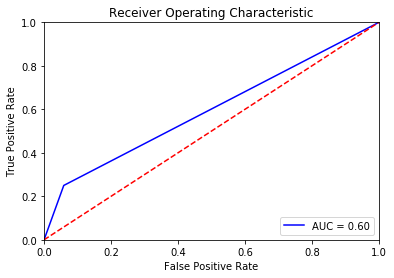

In [19]:
def main():
    filename = 'haberman.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split haberman dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix")

    print(mat)

    fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



main()

Split sonar dataset: 208 rows into train=104 and test=104 rows
Accuracy: 66.34615384615384
[[29 11]
 [24 40]]


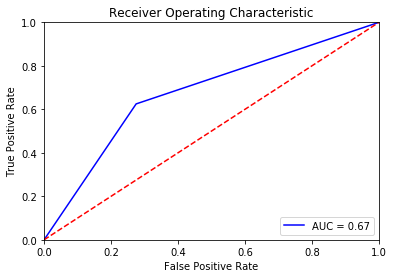

In [25]:
def main():
    filename = 'sonar_dataset.csv'
    splitRatio = 0.50
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split sonar dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print(mat)
    
    fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


main()

Split haberman dataset: 305 rows into train=213 and test=92 rows
Accuracy: 81.52173913043478
Confusion Matrix
[[66  6]
 [11  9]]


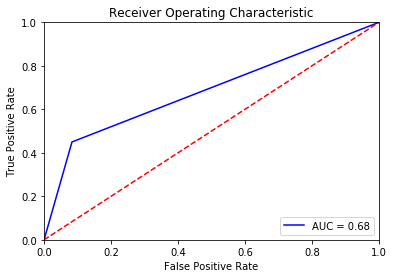

In [5]:
def main():
    filename = 'new_haberman.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split haberman dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix")

    print(mat)

    fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



main()

Split sonar dataset: 207 rows into train=144 and test=63 rows
Accuracy: 100.0
Confusion Matrix
[[26  0]
 [ 0 37]]


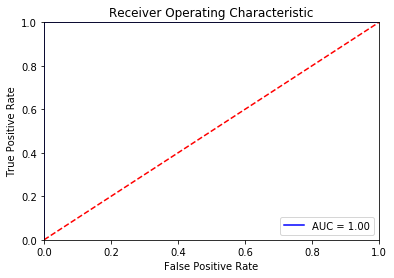

In [26]:
def main():
    filename = 'new_sonar.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split sonar dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix")

    print(mat)

    fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



main()

Split blood transfusion dataset: 747 rows into train=522 and test=225 rows
Accuracy: 74.22222222222223
Confusion Matrix
[[ 33  27]
 [ 31 134]]


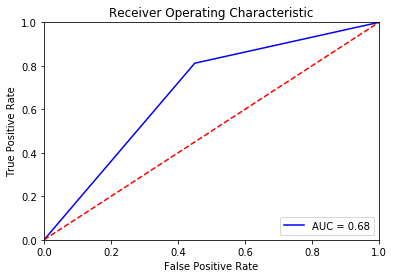

In [21]:
def main():
    filename = 'new_blood_trans.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split blood transfusion dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix")

    print(mat)

    fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



main()

Split blood transfusion dataset: 745 rows into train=521 and test=224 rows
Accuracy: 65.17857142857143
Confusion Matrix
[[119  50]
 [ 28  27]]


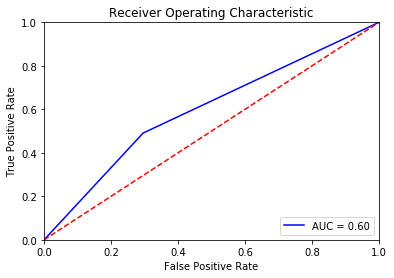

In [20]:
def main():
    filename = 'blood_transfusion.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split blood transfusion dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix")

    print(mat)

    fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



main()

Split blood transfusion dataset: 746 rows into train=522 and test=224 rows
Accuracy: 61.60714285714286
Confusion Matrix
[[ 37   9]
 [ 77 101]]


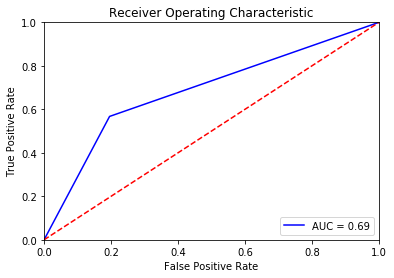

In [29]:
def main():
    filename = 'pca_data/blood_tranfusion_pca.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split blood transfusion dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix")

    print(mat)

    fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



main()

Split haberman dataset: 305 rows into train=213 and test=92 rows
Accuracy: 68.47826086956522
Confusion Matrix
[[51 17]
 [12 12]]


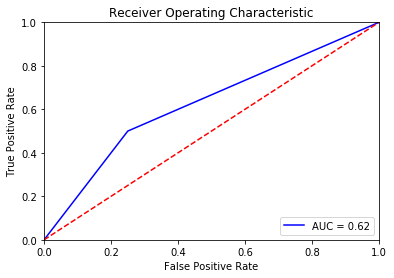

In [28]:
def main():
    filename = 'pca_data/haberman_pca.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split haberman dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix")

    print(mat)

    fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



main()

Split haberman dataset: 207 rows into train=144 and test=63 rows
Accuracy: 60.317460317460316
Confusion Matrix
[[24 10]
 [15 14]]


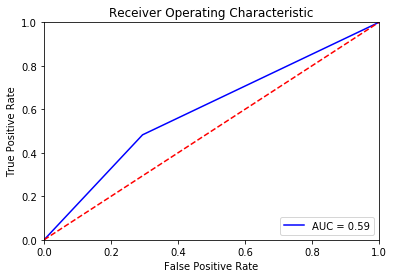

In [10]:
def main():
    filename = 'pca_data/sonar_pca.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split haberman dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix")

    print(mat)

    fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
    roc_auc = metrics.auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()



main()

In [30]:
def main():
    filename = 'pca_data/wine_pca.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split wine dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix")

    print(mat)

#     fpr, tpr, threshold = metrics.roc_curve(true_y, predictions)
#     roc_auc = metrics.auc(fpr, tpr)

#     plt.title('Receiver Operating Characteristic')
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#     plt.legend(loc = 'lower right')
#     plt.plot([0, 1], [0, 1],'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()



main()

Split wine dataset: 177 rows into train=123 and test=54 rows
Accuracy: 96.29629629629629
Confusion Matrix
[[20  0  0]
 [ 0 13  0]
 [ 1  1 19]]


In [16]:
def main():
    filename = 'pca_data/iris_after_pca.csv'
    splitRatio = 0.70
    dataset = load_csv(filename)
    str_column_to_int(dataset, len(dataset[0])-1)
    for i in range(0, len(dataset[0])-1):
        str_column_to_float(dataset, i)
#     print(dataset)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split iris dataset: %s rows into train=%s and test=%s rows'%(len(dataset), len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: %s'%accuracy)
    true_y = []
    for element in testSet:
        true_y.append(element[-1])
        
    mat = confusion_matrix(true_y, predictions)
    print("Confusion Matrix:")
    print(mat)
    
    
main()

Split iris dataset: 150 rows into train=105 and test=45 rows
Accuracy: 100.0
Confusion Matrix:
[[12  0  0]
 [ 0 17  0]
 [ 0  0 16]]
